In [1]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
import numpy as np
import random
from GeneticNeuralNetwork import network_to_array, array_to_state_dict, population_size
from Genetic_Algorithm3 import *
%matplotlib inline

In [2]:
class Network(nn.Module):
    def __init__(self, state_size, action_size):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(state_size,32)
        self.fc2 = nn.Linear(32,action_size)
    def forward(self, data):
        x = self.fc1(data)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
network = Network(4,1).to(device)
network.eval()
print(network)

Network(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)


In [3]:
env = gym.make("CartPole-v0")
print("Action Space size :{}".format(env.action_space))
print("State Space size :{}".format(env.observation_space))

Action Space size :Discrete(2)
State Space size :Box(4,)


In [4]:
def calculate_fitness(data, network, display = False):
    state_dict_population = array_to_state_dict(data, network)
    network.load_state_dict(state_dict_population)
    state = env.reset()
    score =  0  
    while True:
        if display: env.render()
        tensor_state = torch.from_numpy(state).float().to(device)
        action = network.forward(tensor_state).cpu().detach().numpy()[0]
        discrete_action = 0 if action<0.5 else 1
        next_state, reward, done, _ = env.step(discrete_action)  
        score += reward
        state = next_state
        if done:
            break
    return score

In [5]:
def population_generation(network, nos_pop): 
    return [list(np.random.randn(population_size(network))) for _ in range(nos_pop)]

In [6]:
SIZE = 10    #Size of each population
POP = 12    #Population in each batch
NOS_TOP = 4 #Number of top selected population per population
ITERATION = 50 #Number of Iteration 

In [7]:
np.random.randn(population_size(network))
genetic_algo = GeneticAlgorithm(SIZE, POP, NOS_TOP, 9, population_generation, calculate_fitness, network)

Population Class Initialised
Selection Initialised
Crossover Class Initialised
Mutaion Initialised
Plotting Initialised


In [8]:
def train(iteration):
    for i in range(iteration):
        weight_population = np.random.randn(population_size(network))
        weight_population = list(weight_population)
        state_dict_first = array_to_state_dict(weight_population, network)
        score = calculate_fitness(state_dict_first, network)
        print(score)

In [10]:
genetic_algo.train(10)

Trainig Over


No handles with labels found to put in legend.


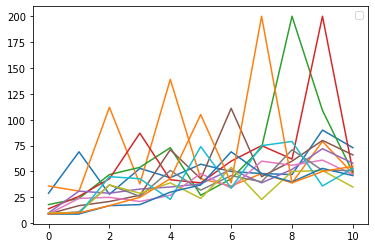

In [11]:
genetic_algo.multiplot.multi_plot()